## 灰色预测模型
#### 相关概念
- 白色系统：指一个系统的内部特征的完全已知的，即系统信息是完全公开的
- 黑色系统：与白色系统相反，指一个系统的内部信息对外界来说是一无所知的，只能通过它与外界的联系来加以观测研究
- 灰色系统：介于白色系统和黑色系统之间，即系统内一部分信息是已知的，但另一部分信息是未知的，系统内各因素间有不确定的关系
#### 灰色系统的特点
- 用灰色数学处理不确定量，使之量化
- 充分利用已知信息寻求系统的运动规律
- 灰色系统理论能处理贫信息系统
#### 灰色预测的优势
- 目前常用的一些预测方法（如回归分析等），需要较大的样本，对于少样本的情况就会造成比较大的误差，使预测目标失效。而灰色预测模型所需的建模信息少、运算方便、建模精度高，因此在各种预测领域都有着广泛的应用，是处理小样本预测问题的有效工具
#### 灰色生成
- 累加生成
    - 通过数列间各数据的依个累加以得到新的数据与数列，累加前的数列称为原始数列，累加后的数列称为生成数列。累加生成是使灰色过程由灰变白的一种方法。
    - 通过累加生成可以看出灰量积累过程的发展态势，使离乱的原始数据中蕴含的积分特性或规律加以显化。
    $$\text{原始数据：}x^{(1)}=[x_1^{(1)},x_2^{(1)},x_3^{(1)},\dots]$$
    $$\text{累加数据：}x_k^{(2)}=\sum^k_{i=1}x_i^{(1)}$$
#### 灰色模型：GM(1,1)
- 灰色模型是利用离散随机数经过生成变为随机性被显著削弱而且较有规律的生成数，建立起的微分方程形式的模型。
- $x^{(2)}$的灰导数： $$x_k^{(1)}=x_k^{(2)}-x_{k-1}^{(2)}$$
- 令$z_k$为$x^{(2)}$的临近生成数列，即白化背景值： $$z_k=\alpha x_k^{(1)}+(1-\alpha)x^{(1)}$$
- GM(1,1) 的灰微分方程模型为: $$x_k^{(1)}+az_k=b$$
- 其中 a 为发展系数，b 为灰作用量 
$$u=\left[ \begin{matrix}a \\ b\end{matrix} \right],Y=\left[ \begin{matrix}x_2^{(1)} \\ x_3^{(1)} \\ . \\ . \\ . \\ x_n^{(1)}\end{matrix} \right],B=\left[ \begin{matrix}-z_2^{(1)} & 1 \\ -z_3^{(1)} & 1 \\ . & . \\ . & . \\ . & . \\ -z_n^{(1)} & 1\end{matrix} \right]$$
- 则 GM(1,1) 的模型表示为： $$Y=Bu$$
- 用最小二乘法求 a、b 的估计值： $$u=\left[ \begin{matrix}a \\ b\end{matrix} \right]=(B^T B)^{-1}B^T Y$$
#### 灰色预测的流程
- 数据的检验与处理: 对已知数据做必要的检验处理，看GM(1,1)的模型能否使用
    - 原始数据：$x^{(1)}=[x_1^{(1)},x_2^{(1)},x_3^{(1)},\dots]$，数据的极比：$$\lambda(k)=\frac{x_{k-1}^{(1)}}{x_k^{(1)}}$$
    - 如果所有的级比都落在可容覆盖区间$X=(e^{\frac{-2}{n+2}},e^{\frac{2}{n+2}})$内，则可以进行灰度预测，否则对数据做适当的变换处理
- 建立GM(1,1)模型 $$x_k^{(1)}+az_k=b$$
    - 用回归分析求得 a、b 的估计值，于是相应的白化模型为：$$\frac{dx_t^{(2)}}{dt}+ax_t^{(2)}=b$$
    - 解为：$$x_t^{(2)}=(x_1^{(1)}-\frac{b}{a})e^{-a(t-1)}+\frac{b}{a}$$
    - 得到预测值：$$x_{k+1}^{(2)}=(x_1^{(1)}-\frac{b}{a})e^{-ak}+\frac{b}{a}$$
    - 进一步得到原始预测值：$$\hat{x}_{k+1}^{(1)}=\hat{x}_{k+1}^{(2)}-\hat{x}_{k}^{(2)}$$
- 检验预测值
    - 相对误差大小检验法：$$\epsilon(k)=\frac{x_k^{(1)}-\hat{x}_k^{(1)}}{x_k^{(1)}}$$
    - 如果对所有的 $|\epsilon(k)| < 0.1$，则认为到达较高的要求;如果对所有的 $|\epsilon(k)| < 0.2$，则认为到达一般的要求.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# 支持显示中文
plt.rcParams['font.family'] = 'Heiti TC'
plt.rcParams['axes.unicode_minus']=False

In [3]:
x0 = np.array([174,179,183,189,207,234,220.5,256,270,285])
year = np.array(np.arange(1995,2005))

In [4]:
class GrayPre:
    def __init__(self, xdata, ydata):
        # 自变量，通常是时间
        self.xdata = xdata 
        # 因变量，通常想要预测的数据
        self.ydata = ydata
        # 存储 ydata 的长度
        self.n = len(ydata)
        
        # 如果 xdata 或 ydata 不为列向量，则会被重塑为列向量。
        if self.xdata.shape[0] > 1:
            self.xdata = self.xdata.reshape(-1,1)
        if self.ydata.shape[0] > 1:
            self.ydata = self.ydata.reshape(-1,1)

        if True in self.ydata < 0:
            print('不能有负数')
            
        print('原始数据长度：%s' % self.n)
        if self.n <= 3:
            print('数据量太小')
        elif self.n > 10:
            print('可以考虑使用其他方法进行预测')
    
    # 绘制 xdata 与 ydata 的一个简单的带有网格线和标签轴关系图。
    def gplot(self, gxlabel, gylabel):
        plt.plot(self.xdata, self.ydata, marker='o', markerfacecolor='none')
        plt.grid()
        plt.xlabel(gxlabel)
        plt.ylabel(gylabel)
        plt.show()
        
    def expon_test(self):
        print('准指数规律检验')
        year = self.xdata
        x0 = self.ydata
        
        # 计算 x^(0) 的累积和 x^(1)
        x1 = np.cumsum(x0).reshape(-1, 1)
        
        # 计算光滑度 rho(k)=x0(k)/x1(k-1)
        rho = x0[1:] / x1[:-1]
        
        # 统计小于0.5的个数
        print(sum((rho<0.5).astype(int))[0])
        
        plt.plot(year[1:], rho, marker='o', markerfacecolor='none')
        plt.grid()
        plt.axhline(y=0.5, color='r', linestyle='--', label='平均违约率')
        plt.text(year[-3]-1,0.55, '临界线：y=0.5', fontsize=15)
        
    train_x0 = x0[:-3]  
    test_x0 = x0[-3:]
    
    def gm11(self, test_num=3, pre_num=3):
        # 原始数据
        x0 = self.ydata
        # 原始数据的长度
        n = len(x0)
        # 计算累积和
        x1 = np.cumsum(x0).reshape(-1, 1)
        # 生成序列 z1，即相邻累积和平均值的序列
        z1 = (x1[:-1]+x1[1:]) / 2
        
        # 对 z1 和 y(ydata[1:]) 进行线性回归拟合。
        y = x0[1:]
        x = z1
        reg = LinearRegression()
        reg.fit(x,y)
        
        # 求得 a, b 估计值
        a = -np.unique(reg.coef_)[0]
        b = np.unique(reg.intercept_)[0]
        
        # 根据 GM(1,1) 模型预测序列 x0_hat，并计算未来的值
        x0_hat = np.zeros((n, 1))
        x0_hat[0] = x0[0]
        for i in range(n - 1):
            x0_hat[i + 1] = (1 - np.exp(a)) * (x0[0] - b / a) * np.exp(- a * (i + 1))
        self.x0_hat = x0_hat
        result = np.zeros((pre_num, 1))
        
        for i in range(pre_num):
            result[i] = (1 - np.exp(a)) * (x0[0] - b / a) * np.exp(- a * (n + i))

        self.result = result
        
        # 计算预测值与实际值之间的绝对残差和相对残差。
        absolute_residuals = x0[1:] - x0_hat[1:]
        relative_residuals = abs(absolute_residuals) / x0[1:]
        
        # 级比与级比偏差
        class_ratio = x0[1:] / x0[:-1]
        eta = abs(1 - (1 - 0.5 * a) / (1 + 0.5 * a) * (1 / class_ratio))
        self.eta = eta
        
        plt.plot(year[1:], relative_residuals)
        
        return result
    
    # 改进版的 GM(1,1) 预测
    # 使用 sigle_compute_result 方法迭代预测 pre_num1 个未来值。
	# 结果附加到原始数据 x0，实现迭代预测。
    def new_gm11(self, x0, pre_num1=3):
        result1 = np.zeros((pre_num1,1))
        x0_ = x0
        for i in range(pre_num1):
            result1[i] = self.sigle_compute_result(x0=x0_, pred_num=1)
            x0_ = np.append(x0_, result1[i])
        return result1
    
    # 计算单步 GM(1,1) 预测
    # 遵循与 gm11 相同的方法，但只返回指定 pred_num 步的预测值。
    def sigle_compute_result(self, x0, pred_num=3):
        n = len(x0)
        x1 = np.cumsum(x0).reshape(-1,1)
        z1 = (x1[:-1] + x1[1:]) / 2
        y = x0[1:]
        x = z1
        reg = LinearRegression()
        reg.fit(x, y)
        a = -np.unique(reg.coef_)[0]
        b = np.unique(reg.intercept_)[0]
        sigle_result = np.zeros((pred_num,1))
        for i in range(pred_num):
            sigle_result[i] = (1 - np.exp(a)) * (x0[0] - b / a) * np.exp(- a * (n + i))
        
        return sigle_result
    
    # 实现了 GM(1,1) 的新陈代谢版本，其中输入数据窗口随着每次预测进行更新
    # 它在每次预测时向前滑动输入窗口，生成 pre_num2 个未来值。    
    def metab_gm11(self,x0,pre_num2=3):
        result2 = np.zeros((pre_num2,1))
        x0__ = x0
        for i in range(pre_num2):
            result2[i] = self.sigle_compute_result(x0=x0__,pred_num=1)
            x0__ = np.append(x0__[1:], result2[i])
        return result2
    
    # 绘制原始数据 (ydata) 与三种不同 GM(1,1) 模型的预测结果：传统 GM(1,1)、改进版 GM(1,1) 和新陈代谢 GM(1,1)
    def draw_result(self):
        x0 = self.ydata[-3:]
        gm11_result = self.sigle_compute_result(x0=self.train_x0)
        new_gm11_result = self.new_gm11(x0=self.train_x0)
        metab_gm11_result = self.metab_gm11(x0=self.train_x0)
        pred_year = self.xdata[-3:]
        plt.plot(pred_year,x0,label='原始数据')
        plt.plot(pred_year,gm11_result,label='gm11预测结果')
        plt.plot(pred_year,new_gm11_result,label='新gm11预测结果')
        plt.plot(pred_year,metab_gm11_result,label='新陈代谢gm11预测结果')
        plt.MultipleLocator(1)
        plt.xticks(np.arange(pred_year[0],pred_year[-1]+1,1))
        plt.legend()
        
    # 使用测试数据计算三个 GM(1,1) 模型的平方误差和 (SSE)   
    def compute_sse(self):
        gm11_result = self.sigle_compute_result(x0=self.train_x0)
        new_gm11_result = self.new_gm11(x0=self.train_x0)
        metab_gm11_result = self.metab_gm11(x0=self.train_x0)

        sse1 = sum((self.test_x0.reshape(-1,1)-gm11_result) **2)
        sse2 = sum((self.test_x0.reshape(-1,1)-new_gm11_result) **2)
        sse3 = sum((self.test_x0.reshape(-1,1)-metab_gm11_result) **2)
        print('传统GM(1,1)预测误差平方和：',sse1[0])
        print('新GM(1,1)预测误差平方和：',sse2[0])
        print('新陈代谢GM(1,1)预测误差平方和：',sse3[0])

原始数据长度：10


array([[303.01223193],
       [322.52210378],
       [343.28814636]])

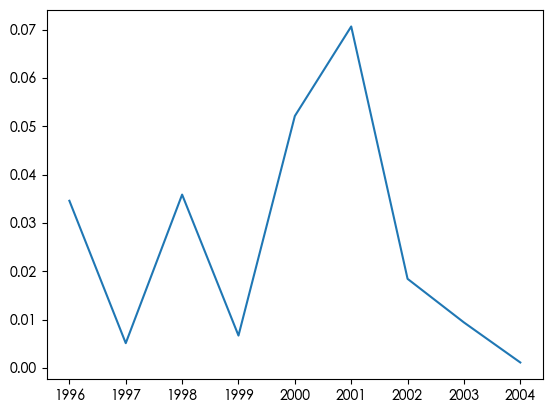

In [5]:
a = GrayPre(xdata=year, ydata=x0)
a.gm11()

In [6]:
np.append(x0, [1,3,4])

array([174. , 179. , 183. , 189. , 207. , 234. , 220.5, 256. , 270. ,
       285. ,   1. ,   3. ,   4. ])

In [7]:
a.eta

array([[0.03467591],
       [0.04114223],
       [0.03061725],
       [0.02814924],
       [0.05840833],
       [0.12957581],
       [0.08319547],
       [0.00921645],
       [0.00838651]])

In [8]:
np.exp(2)

7.38905609893065

准指数规律检验
7


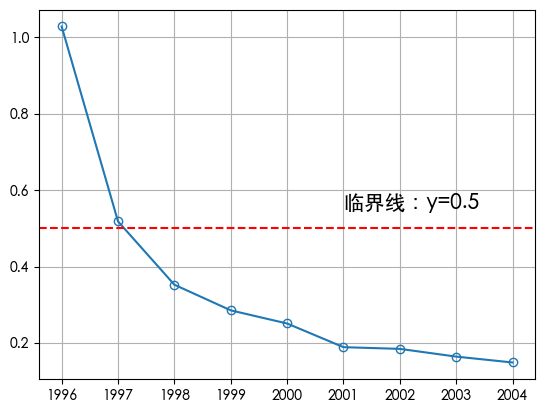

In [9]:
a.expon_test()

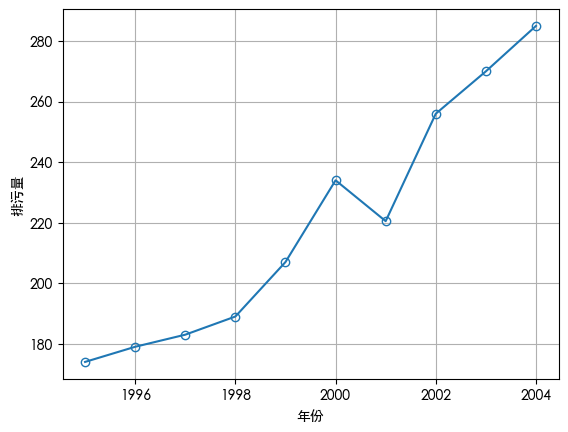

In [10]:
a.gplot('年份','排污量')

In [11]:
True in x0 < 0

False

In [12]:
year = np.array(np.arange(1995,2005)).reshape(-1,1)
x0 = np.array([174,179,183,189,207,234,220.5,256,270,285]).reshape(-1,1)

np.cumsum(x0)

array([ 174. ,  353. ,  536. ,  725. ,  932. , 1166. , 1386.5, 1642.5,
       1912.5, 2197.5])

In [13]:
LinearRegression??

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Source:        
class LinearRegression(MultiOutputMixin, RegressorMixin, LinearModel):
    """
    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    copy_X : bool, default=True
        If True, X will be copied; else, it may be overwritten.

    n_jobs : int, default=None
        The number of jobs to use for the computation. This will only provide
        speedup in case of sufficiently large problems, that 